<a href="https://colab.research.google.com/github/amalmon/cardio-vascular-risk-prediction/blob/main/cardio_vascular_risk_prediction_individual_notebook_by_AMAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description
Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [98]:
import pandas as pd
import numpy as np


In [99]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/CAPSTONE PROJECT 3 ML CLASSIFICATION/Copy of data_cardiovascular_risk.csv')

In [100]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Data cleaning

In [101]:
#looking for clss distribution
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [102]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [103]:
#inspecting that is there any duplicate entries
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


no duplicate entries

In [104]:
#looking for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [105]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [106]:
df[df.cigsPerDay.isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


from this it is clear that the data of peoples with out cigerates per day where not no-smokers

so, replacing null values with average

In [107]:
#filling null vales with mean
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)

In [108]:
#for education column value counts
df.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [109]:
#filling null vales of education column with mode
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [110]:
df[df.education.isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


null values of totchol with average value

null values of BMI with average value

null values of glucose lvl with average value

In [111]:
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace= True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**BPmeds**

In [113]:
df.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [114]:
df[df['BPMeds']==0]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.980000,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1


we have systolic and diastolic pressure given.
in case of BPMeds null value there may be peoples with blood pressure issue
so, we researched about systolic and diastolic blood pressure and founded its close relation to the blood pressure issue.

here, **we are trying to catogarize patients with null values of BPMed into whether they were blong to systolic and diastolic BP range of BP medication taking patinets or not**

In [115]:
df.groupby('BPMeds',as_index=False).agg({'sysBP':'mean','diaBP':'mean'})

,BPMeds,sysBP,diaBP
0,0.0,131.47366,82.438386
1,1.0,165.89000,96.590000


here, we can say that BPMeds=0 datapionts have bp range 82.43 - 131.47

& BPMeds=1 datapoints have bp range 96.59 - 165.89



In [116]:
df[df['BPMeds']==1]['sysBP'].std()

26.2569452091665

here we checked mean systolic bp of bp patients it is 165.89

and its standard deviation is 26.25

so we are taking one standard deviation down from the mean value to decide the bp patients and non bp patients classification bar

rounded it as 140

and filling null values of BPMed with 1 if systolic bp > 140 else 0

In [117]:
df['BPMeds'] = df.apply(
    lambda x: 0 if np.isnan(x['BPMeds']) and x['sysBP']<140 else x['BPMeds'],
    axis=1
)

In [118]:
df['BPMeds'] = df.apply(
    lambda x: 1 if np.isnan(x['BPMeds']) and x['sysBP']>=140 else x['BPMeds'],
    axis=1
)

In [119]:
df[df['BPMeds'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**SINGLE VARIATE ANALYSIS**

DRAWING ALL FEATURES DISTRIBUTION GRAPH


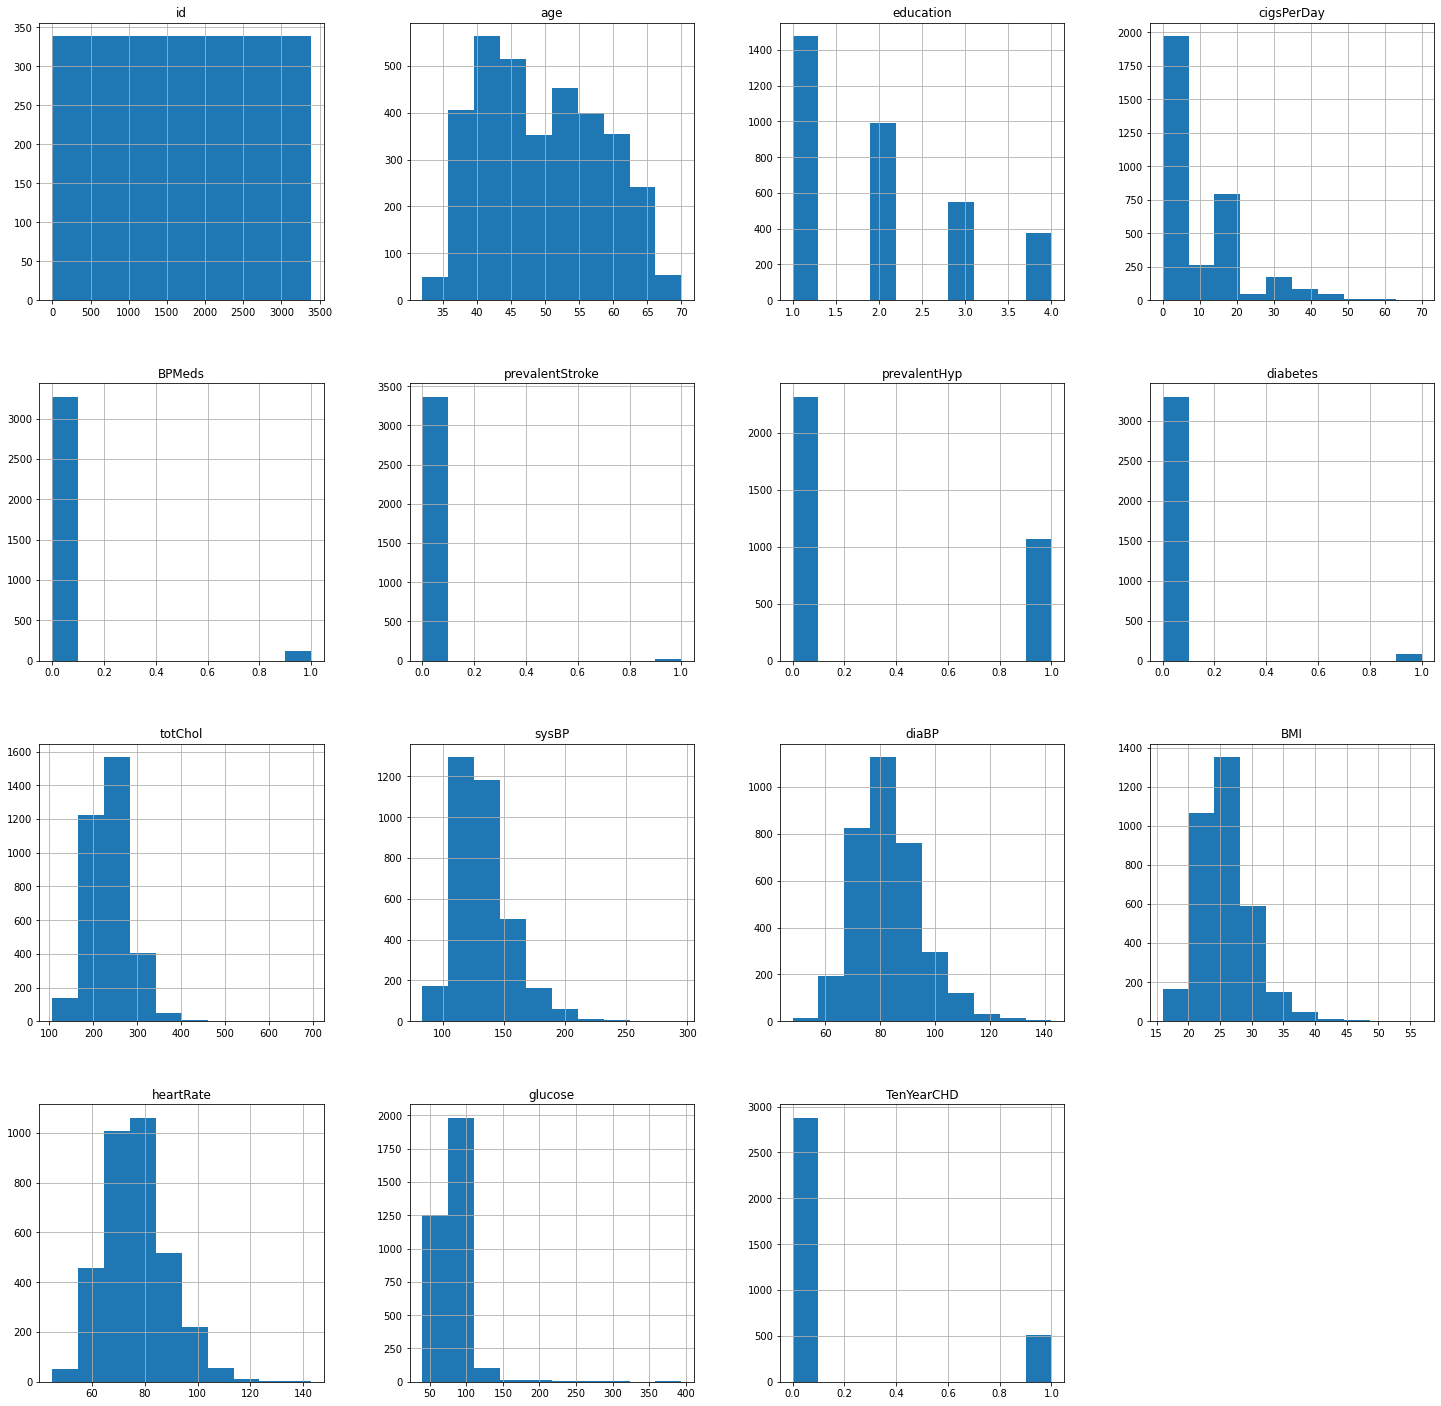

In [121]:
import matplotlib.pyplot as plt
df.hist(figsize=[25,25])
plt.show()

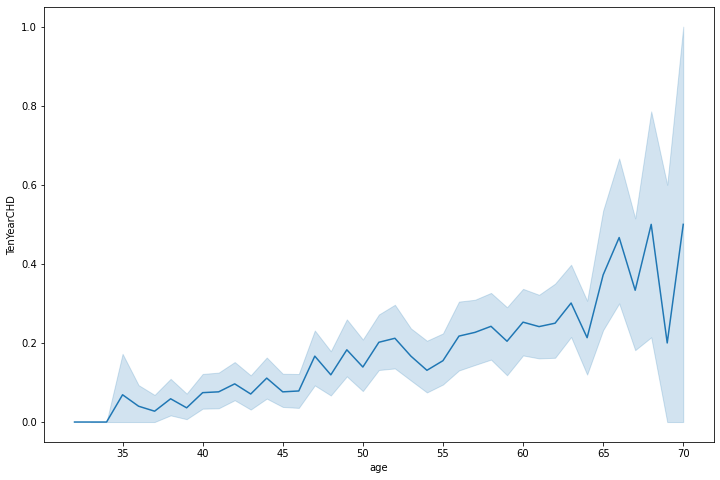

In [122]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='TenYearCHD',data=df)

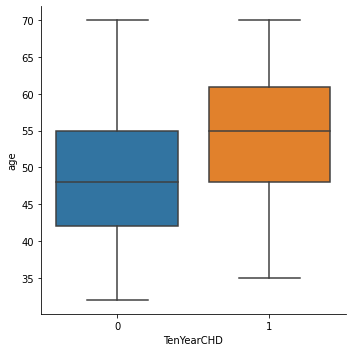

In [123]:
sns.catplot(data=df, x="TenYearCHD", y="age", kind="box")

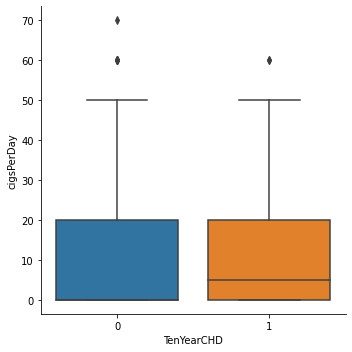

In [124]:
sns.catplot(data=df, x="TenYearCHD", y="cigsPerDay", kind="box")

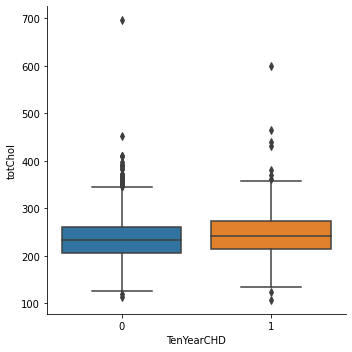

In [125]:
sns.catplot(data=df, x="TenYearCHD", y="totChol", kind="box")

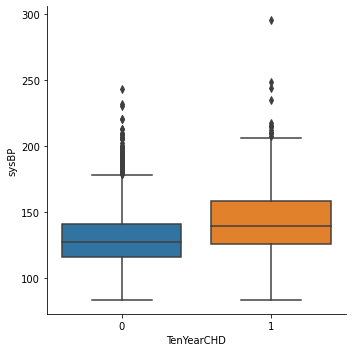

In [126]:
sns.catplot(data=df, x="TenYearCHD", y="sysBP", kind="box")

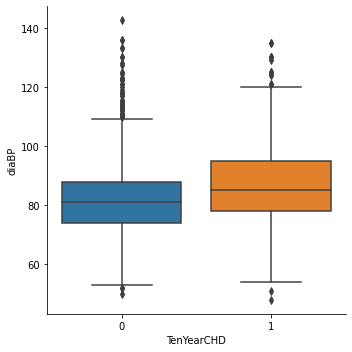

In [127]:
sns.catplot(data=df, x="TenYearCHD", y="diaBP", kind="box")

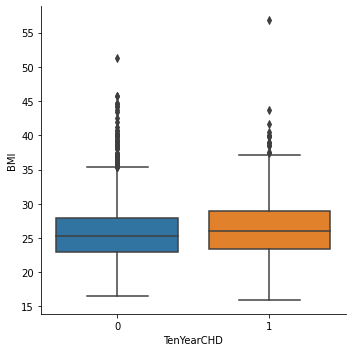

In [128]:
sns.catplot(data=df, x="TenYearCHD", y="BMI", kind="box")

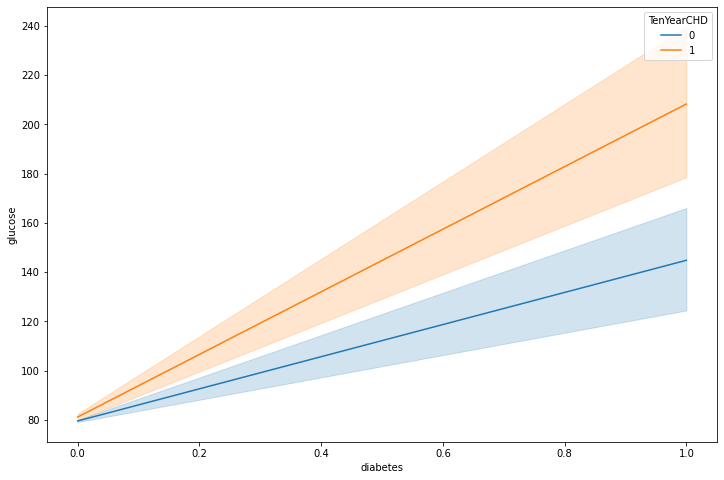

In [129]:
plt.figure(figsize=(12,8))
sns.lineplot(x='diabetes',y='glucose',hue='TenYearCHD',data=df)

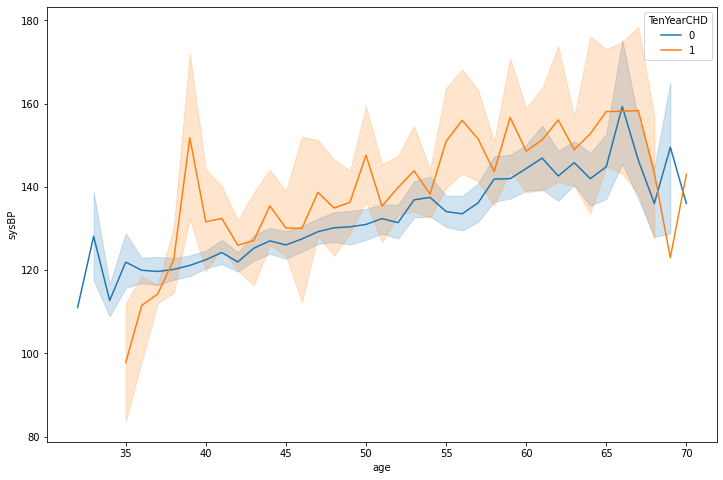

In [130]:
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='sysBP',hue='TenYearCHD',data=df)

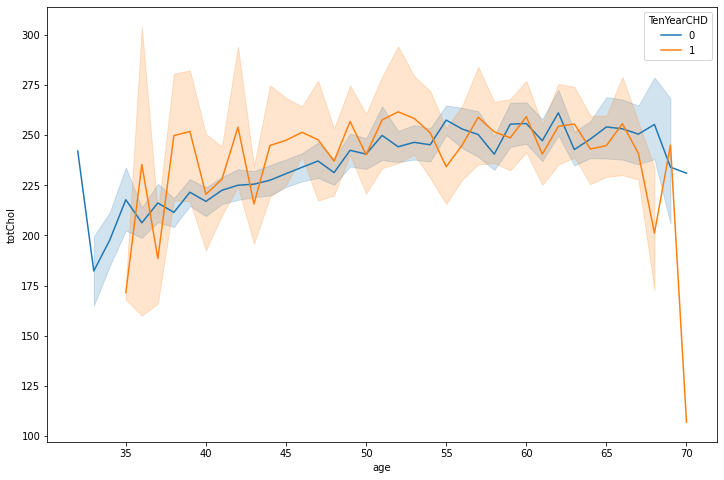

In [131]:
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='totChol',hue='TenYearCHD',data=df)

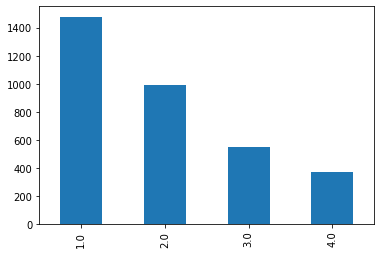

In [132]:
df['education'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


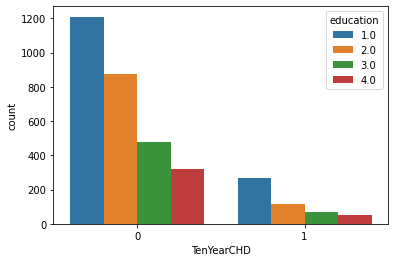

In [133]:
sns.countplot(df.TenYearCHD,hue=df.education)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


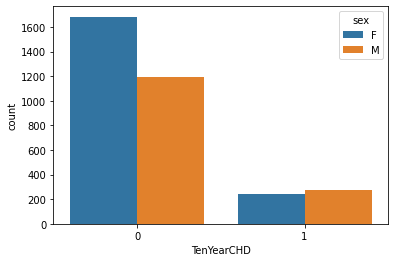

In [134]:
sns.countplot(df.TenYearCHD,hue=df.sex)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


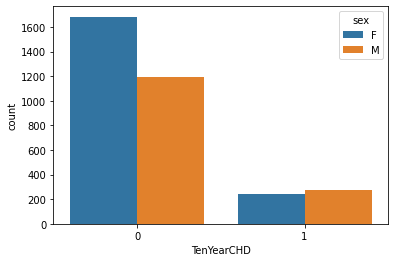

In [135]:
sns.countplot(df.TenYearCHD,hue=df.sex)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


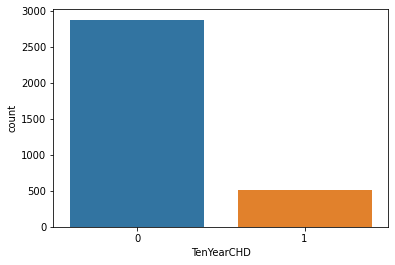

In [136]:
sns.countplot(df.TenYearCHD)

showing class imbalance in target variable

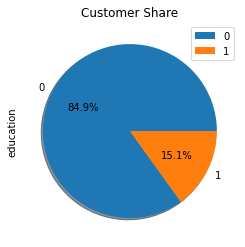

In [137]:
df.groupby("TenYearCHD")["education"].count().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()


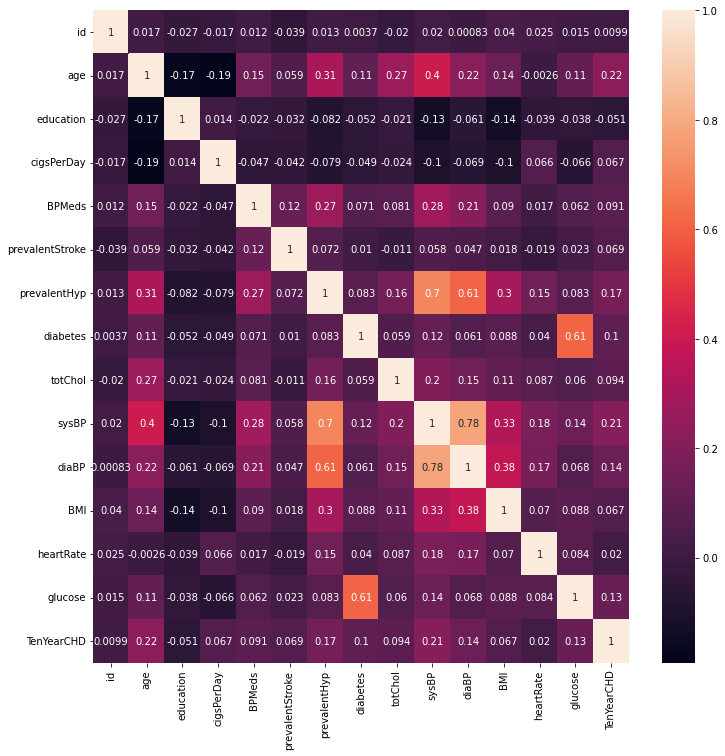

In [138]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [139]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,1.0,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0


### **ENCODING FOR CATEGORICAL FEATURES**

LABEL ENCODING (SEX , IS_SMOKING)

In [140]:
#importing library
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [141]:
df.sex=label_encoder.fit_transform(df.sex)

In [142]:
df.is_smoking=label_encoder.fit_transform(df.is_smoking)

ONE HOT ENCODING

In [143]:
#Dummification
df=pd.get_dummies(df,columns=['education'],prefix='eductn_lvl')

In [144]:
df

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,eductn_lvl_1.0,eductn_lvl_2.0,eductn_lvl_3.0,eductn_lvl_4.0
0,0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1,0,0
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,0,0,0,1
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0,0,0
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,0,0,0
4,4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,1,0,0,0
3386,3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,1,0,0,0
3387,3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,0,0,1,0
3388,3388,60,1,0,0.0,1.0,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0,1,0,0,0


### **TRAIN TEST SPLIT**

In [145]:
X=df.drop('TenYearCHD',axis=1)
Y=df.TenYearCHD

In [146]:
#spliting data set

# split training and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [147]:
Y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

In [148]:
len(X_test)

678

In [149]:
len(X_train)

2712

In [150]:
len(Y_train)

2712

### **SMOTE**

In [151]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train,Y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 2712
Resampled dataset shape 4606


## **MODELING**

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### **LOGISTIC REGRESSION**

In [153]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(fit_intercept=True, max_iter=10000)
clf_logistic.fit(x_smote,y_smote)

LogisticRegression(max_iter=10000)

In [154]:
# Get the predicted classes
train_class_preds = clf_logistic.predict(x_smote)
test_class_preds = clf_logistic.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [156]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8004776378636561
The accuracy on test data is  0.8097345132743363


In [157]:
clf_logistic.score(X_test, Y_test)

0.8097345132743363

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


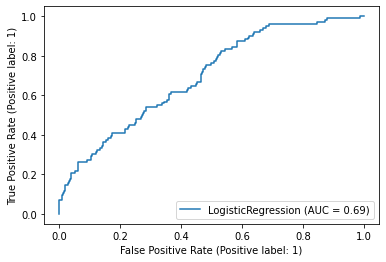

In [158]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(clf_logistic, X_test, Y_test)

In [159]:
# Confusion matrix
print(confusion_matrix(Y_test, test_class_preds))

[[521  55]
 [ 74  28]]


In [160]:
print(classification_report(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       576
           1       0.34      0.27      0.30       102

    accuracy                           0.81       678
   macro avg       0.61      0.59      0.60       678
weighted avg       0.79      0.81      0.80       678



### **KNN**

KNN is a distance based algorithm so, we have to scale the data set

In [193]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [263]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(X_test)

In [265]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train_scaled, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_scaled, Y_test) 

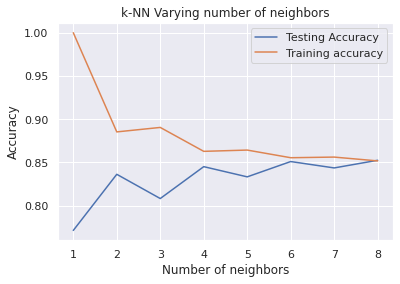

In [266]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [267]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [268]:
# Fit the model
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [269]:
knn.score(X_test,Y_test)

0.8421828908554573

In [270]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
y_pred

In [271]:
confusion_matrix(Y_test,y_pred)

array([[569,   7],
       [100,   2]])

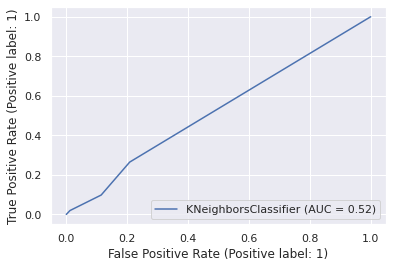

In [272]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(knn, X_test, Y_test)

In [273]:
print(classification_report(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       576
           1       0.34      0.27      0.30       102

    accuracy                           0.81       678
   macro avg       0.61      0.59      0.60       678
weighted avg       0.79      0.81      0.80       678



### **xG BOOST**

In [232]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_smote, y_smote)

# predict
xgb_y_predict = xgb_model.predict(X_test)

In [233]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8004776378636561
The accuracy on test data is  0.8097345132743363


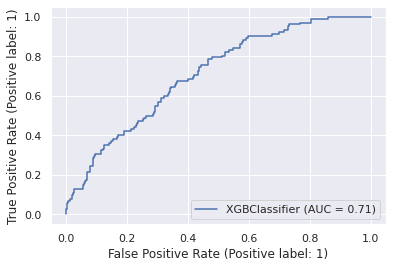

In [234]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(xgb_model, X_test, Y_test)

In [247]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       576
           1       0.40      0.02      0.04       102

    accuracy                           0.85       678
   macro avg       0.63      0.51      0.48       678
weighted avg       0.78      0.85      0.79       678



### **RANDOM FOREST**


In [248]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
rf_clf = RandomForestClassifier(n_estimators = 100) 

In [277]:
# Train the model using the training sets
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [278]:
rf_clf.score(X_test, Y_test)

0.855457227138643

In [279]:
# predict
rf_y_predict = rf_clf.predict(X_test)

In [280]:
print('Accuracy score:', accuracy_score(Y_test, rf_y_predict))

Accuracy score: 0.855457227138643


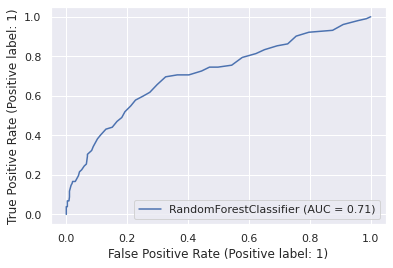

In [281]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rf_clf, X_test, Y_test)

In [283]:
confusion_matrix(Y_test,rf_y_predict)

array([[573,   3],
       [ 95,   7]])

In [282]:
print(classification_report(Y_test, rf_y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       576
           1       0.70      0.07      0.13       102

    accuracy                           0.86       678
   macro avg       0.78      0.53      0.52       678
weighted avg       0.83      0.86      0.80       678

